<a href="https://colab.research.google.com/github/cristobalperezp/Intro_Deep_Learning/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><strong>Tarea 2</strong></h1></center>
<center>Integrantes</center>
<center>Cristobal Pérez - Ignacio Henríquez - Michelle Avendaño - Tamara Vallejo</center>


<center>Curso</center>
<center>Introducción al Deep Learning</center>
<center>Profesor</center>
<center>Ángel Jiménez</center>
<center>Auxiliar</center>
<center>Rafael De La Sotta</center>
<center>Ayudantes </center>
<center>Camila Pulgar - Gabriela Mora - Maximiliano Rosadio - Patricio Ortiz - Sebastian Urbina </center>

In [ ]:
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from google.colab import drive
from google.colab import files 
import zipfile

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

###Descargar Datos###

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/Tarea2deep.zip 


Archive:  /content/drive/MyDrive/Tarea2deep.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Preprocesamiento

In [ ]:
batch_size = 100
img_height = 150
img_width = 150

In [ ]:
data_dir='/content/cell_images/cell_images'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [ ]:
data_dir='/content/cell_images/cell_images'
train_ds1 = tf.keras.utils.image_dataset_from_directory( 
     data_dir, validation_split=0.2, subset="training", 
     seed=123, batch_size=batch_size) 

train_ds1 = train_ds1.unbatch()
images = list(train_ds.map(lambda x, y: x))
labels = list(train_ds.map(lambda x, y: y))

print(len(labels))
print(len(images))

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
221
221


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Parasitized', 'Uninfected']


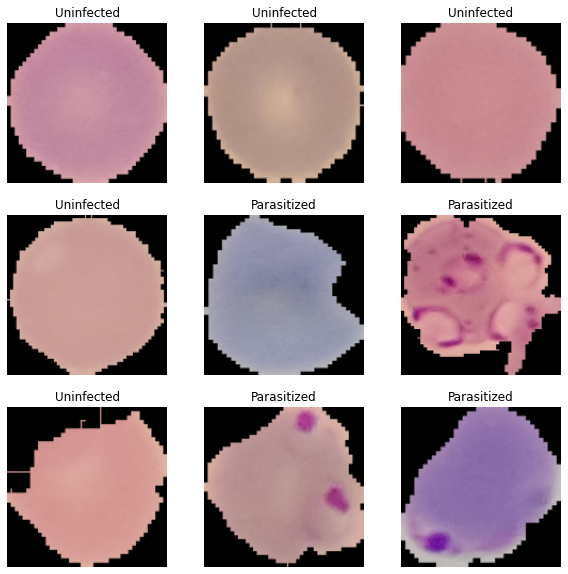

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    

image_batch es un tensor de la forma (100, 150, 150, 3) . Este es un lote de 100 imágenes de forma 150x150x3 (la última dimensión se refiere a los canales de color RGB). El label_batch es un tensor de la forma (100,) , estas son las etiquetas correspondientes a las 100 imágenes.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 150, 150, 3)
(100,)


Se normalizan los datos

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in [0,1].
print(np.min(first_image), np.max(first_image))

0.0 0.843938


# Data augmentation

In [ ]:

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_ds1,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     class_mode='categorical')

TypeError: ignored

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_ds,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=img_width,
    shuffle=True,
    seed=1968,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
  )

TypeError: ignored

In [ ]:
augmented_images = [train_ds[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
#def resize_and_rescale(image, label):
  #image = tf.cast(image, tf.float32)
  #image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  #image = (image / 255.0)
 # return image, label

In [ ]:
#def augment(image_label, seed):
  #image, label = image_label
  #image, label = resize_and_rescale(image, label)
  #image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  #new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  #image = tf.image.stateless_random_crop(
      #image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  #image = tf.image.stateless_random_brightness(
      #image, max_delta=0.5, seed=new_seed)
  #image = tf.clip_by_value(image, 0, 1)
  #return image, label

In [ ]:
#aug_ds = train_ds.map(
  #lambda x, y: (resize_and_rescale(x, training=True), y))

In [ ]:
#batch_size = 100
#AUTOTUNE = tf.data.AUTOTUNE

#def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  #ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              #num_parallel_calls=AUTOTUNE)

  #if shuffle:
    #ds = ds.shuffle(1000)

  # Batch all datasets.
  #ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  #if augment:
    #ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                #num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  #return ds.prefetch(buffer_size=AUTOTUNE)